In [1]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Importing the scrapped data: 

In [2]:
df=pd.read_csv('recipes_full_info.csv')

Exploring and preparing the dataset:

In [3]:
df.shape

(1537, 8)

#### Preparation time:

In [4]:
df.prep_time.value_counts()

Pá-Pum        780
Até 1h        307
Até 2h        251
Mais de 2h    199
Name: prep_time, dtype: int64

#### Types:

In [5]:
df.type.value_counts()

main       656
side       439
dessert    329
drink      113
Name: type, dtype: int64

#### Portions:

In [6]:
replacements = {"12 porções": "Mais de 6 porções",
                "10 porções": "Mais de 6 porções",
                "6 picolés": "Até 6 porções",
                "15 porções": "Mais de 6 porções",
                "10 espetos (4 pessoas)": "Até 4 porções",
                "4 porções": "Até 4 porções",
                "2 porções": "Até 2 porções",
                "6 porções": "Até 6 porções",
                "8 porções": "Mais de 6 porções",
                "16 porções": "Mais de 6 porções",
                "4 drinques": "Até 4 porções",
                "3 pessoas": "Até 4 porções",
                "1 pizza": "Até 4 porções",
                "1 pote de 200 ml": "1 porção",
                "1 ½  xícara (chá) (330 g)": "Mais de 6 porções",
                "1/2 xícara (chá) (cerca de 150 g)": "Mais de 6 porções",
                "1 taça": "1 porção",
                "1 pizza": "Até 4 porções",
                "1 potinho": "Até 4 porções",
                "14 porções": "Mais de 6 porções",
                "12 pessoas": "Mais de 6 porções",
                "4 porções como prato principal e 6 como entrada": "Até 6 porções",
                "10 panquecas": "Mais de 6 porções",
                "6 porções como aperitivo, 4 como acompanhamento": "Até 6 porções",
                "4 porções como principal (e 6 como acompanhamento)": "Até 6 porções",
                "6 porções como entrada ou 4 como prato principa": "Até 6 porções",
                "6 porções como entrada ou 4 como prato principal": "Até 6 porções",
                "200 ml": "1 porção",
                "4 pessoas (jarra de 1 L)": "Até 4 porções",
                "2 bolos (16 fatias cada)": "Mais de 6 porções",
                "12 pedaços": "Mais de 6 porções",
                "10 drinques": "Mais de 6 porções",
                "12 cubos de gelo": "Mais de 6 porções",
                "6 porções como principal e 8 como entrada": "Mais de 6 porções",
                "4 pessoas como entrada ou 2 como prato principal": "Até 4 porções",
                "1 bolo (serve 12 pessoas)": "Mais de 6 porções",
                "5 porções":"Até 6 porções",
                "Serve até 8 porções":"Mais de 6 porções",
                "8 a 10 porções":"Mais de 6 porções",
                "4 porções como principal 6 como aperitivo":"Até 6 porções",
                "12 fatias ":"Mais de 6 porções",
                "8 a 10 porções":"Mais de 6 porções",
                "14 cocadas":"Mais de 6 porções",
                "12 porçõoes":"Mais de 6 porções",
                "8 porções - 3 ½ xícaras (chá)":"Mais de 6 porções",
                "10 porções":"Mais de 6 porções",
                "9 porções":"Mais de 6 porções",
                "2 pessoas como prato principal (ou 4 pessoas como entrada) ":"Até 4 porções",
                "30 porções":"Mais de 6 porções",
                "20 porções":"Mais de 6 porções",
                "1 porção (três bolinhos)":"1 porção",
                "3 pessoas (varia de acordo com o tamanho da cafeteira)":"Até 4 porções",
                "10 verrines":"Mais de 6 porções",
                "8 panquecas":"Mais de 6 porções",
                "4 porções como principal ou 6 como acompanhamento":"Até de 6 porções",
                "4 pessoas como principal ou 6 como acompanhamento":"Até de 6 porções",
                "8 tarteletes":"Mais de 6 porções",
                "6 unidades":"Até 6 porções",
                "10 porções":"Mais de 6 porções",
                "2 pessoas como prato principal (ou 4 pessoas como entrada)":"Até 4 porções",
                "1 bolo grande":"Mais de 6 porções",
                "1 bolo":"Mais de 6 porções",
                "1 torta grande ":"Mais de 6 porções",
                "20 blinis":"Mais de 6 porções",
                "15 bolinhos":"Até 6 porções",
                "25 bolinhos":"Até 6 porções",
                "12 bolinhos":"Até 4 porções",
                "10 a 12 cubos de gelo ":"Até 4 porções",
                "6 bolinhos":"Até 2 porções",
                "6 tortinhas":"Até 6 porções",
                "3 porções":"Até 4 porções",
                "12 porções":"Mais de 6 porções",
                "1 drinque":"1 porção",
                "6 tortinhas":"Até 6 porções",
                "6 rabanadas":"Até 6 porções",
                "4 pizzas":"Mais de 6 porções",
                "2 pizzas":"Mais de 6 porções",
                "1 pessoa" :"1 porção",
                "16 porções":"Mais de 6 porções",
                "2 drinques": "Até 2 porções",
                "4 drinques": "Até 4 porções",
                "1 torta de 25 cm de diâmetro":"Mais de 6 porções",
                "3 ovos de páscoa de 250 g":"Até 4 porções",
                "7 sacolés":"Mais de 6 porções",
                "Até de 6 porções":"Mais de 6 porções",
                "1 copo de 250 ml":"1 porção",
                "15 copos":"Mais de 6 porções",
                "20 brigadeiros":"Mais de 6 porções",
                "8 beijus":"Mais de 6 porções",
                "5 unidades":"Até 6 porções",
                "1 torta média":"Até 6 porções",
                "8 pães":"Mais de 6 porções",
                "2 pães":"Até 2 porções",
                "10 pastéis":"Mais de 6 porções",
                "cerca de 20 unidades":"Mais de 6 porções",
                "12 fatias":"Mais de 6 porções",
                "1 pote":"1 porção",
                "8 unidades":"Mais de 6 porções",
                "12 unidades":"Mais de 6 porções",
                "20 unidades":"Mais de 6 porções",
                "50 unidades":"Mais de 6 porções",
                "30 unidades":"Mais de 6 porções",
                "32 unidades":"Mais de 6 porções",
                "10 unidades":"Mais de 6 porções",
                '54 unidades':"Mais de 6 porções",
                "Até de 6 porções":"Até 6 porções",
                "1 jarra":"Até 4 porções",
                "1/2 xícara (chá)":"1 porção",
                "Rende 1 xícara (chá)":"Até 2 porções",
                "1 xícara (chá)":"1 porção",
                "2 xícaras (chá)":"Até 2 porções",
                "12 pãezinhos":"Mais de 6 porções",
                "10 pãezinhos":"Mais de 6 porções",
                "8 fatias":"Mais de 6 porções",
                "15 fatias":"Mais de 6 porções",
                '14 espetos':"Mais de 6 porções",
                '25 almôndegas':"Mais de 6 porções",
                '800 ml':"Até 4 porções",
                '1 torta grande':"Mais de 6 porções",
                'Rende 1 xícara (chá) (cerca de 250 g)'
                '1 ¾ xícara (chá)':"Até 2 porções",
                '1 pote de 350 g':"1 porção",
                '1 pote de 200 g':"1 porção",
                'Cerca de 1 1/2 xícara (chá)':"Até 2 porções",
                '500 ml':"Até 4 porções",
                '2,5 kg (cerca de 2,2 litros)':"Até 4 porções",
                '½ xícara (chá) (ou 1 pote de 120 ml)':"1 porção",
                '½ xícara (chá)':"1 porção",
                '1 pote de 450 g':"1 porção",
                '1 xícara (cerca de 270 g)':"1 porção",
                '1 pote de 500 ml':"1 porção",
                'cerca de 1 kg':"Até 6 porções",
                '3 xícaras (cerca de 800 g)'
                '350 ml':"Até 2 porções",
                '400 g':"Até 2 porções",
                '300 ml':"Até 4 porções",
                '250 ml':"Até 4 porções",
                '750 ml':"Até 4 porções",
                '16 pastéis':"Mais de 6 porções",
                '56 unidades':"Mais de 6 porções",
                '2 unidades de cerca de 500 g'
                'cerca de 350 g (1 ½ xícara)':"Até 2 porções",
                '1 pote de 90 g':"1 porção",
                '3 xícaras (chá)':"Até 4 porções",
                '2 1/2 xícaras (chá)':"Até 4 porções",
                '75 ovinhos (5 fôrmas de mini ovinhos)':"Mais de 6 porções",
                '10 casquinhas':"Mais de 6 porções",
                'cobre 1 bolo inglês':"1 porção",
                '6 xícaras (chá)':"Até 6 porções",
                '740 g':"Até 4 porções",
                'Cobre um bolo de cerca de 24 cm de diâmetro':"1 porção",
                '18 unidades':"Mais de 6 porções",
                '50 biscoitos':"Mais de 6 porções",
                '1 pote de 300 g':"1 porção",
                '1 ovo de páscoa de 250g':"1 porção",
                '15 unidades':"Mais de 6 porções",
                '10 a 12 cubos de gelo':"Até 4 porções",
                '1,2 litro':"Até 4 porções",
                '1 kg (4 xícaras)':"Até 4 porções",
                '1 litro':"Até 6 porções",
                '1 cacho de uvas':"1 porção",
                'Rende 1 xícara (chá) (cerca de 250 g)':"1 porção",
                '1 ¾ xícara (chá)':"Até 2 porções",
                '3 xícaras (cerca de 800 g)':"Até 4 porções",
                '350 ml':"Até 4 porções",
                '2 unidades de cerca de 500 g':"Até 2 porções",
                'cerca de 350 g (1 ½ xícara)':"Até 2 porções",
               }

In [7]:
df.portions = df.portions.apply(lambda x : replacements[x] if x in replacements.keys() else x)
df.portions.value_counts()

Até 4 porções        548
Até 6 porções        292
Mais de 6 porções    289
Até 2 porções        238
1 porção             168
Até de 6 porções       2
Name: portions, dtype: int64

#### Ingredients:

In [8]:
#!pip install unidecode --user

In [9]:
#Importing functions to text cleaning:

def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    import re
    from unidecode import unidecode
    x = s.replace('(chá)',' ') #To remove the "(chá)" measure, but keep the ingredient.
    y = unidecode(x).lower()
    return re.sub('[^a-z]',' ',y).strip()


def tokenize(s):
    """
    Tokenize a string.

    Args:
        s: String to be tokenized.

    Returns:
        A list of words as the result of tokenization.
    """
    import nltk
    return nltk.word_tokenize(s)


def remove_stopwords(l):
    """
    Remove Portuguese stopwords from a list of strings.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after stop words are removed.
    """
    
    import nltk
    from nltk.corpus import stopwords
    
    stop_words = set(stopwords.words('portuguese'))
    
    filtered_sentence = [w for w in l if not w in stop_words] 
  
    return filtered_sentence


#Finally, we have:
def processing_func(x):
    return remove_stopwords(tokenize(clean_up(x)))

In [10]:
df['final_ingredients'] = df['ingredients'].apply(processing_func)

In [11]:
#Building a bag of words of ingredients

bag_of_ingredients = []

for ingredients_list in df.final_ingredients:
    for ingredient in ingredients_list:
        if ingredient not in bag_of_ingredients:
            bag_of_ingredients.append(ingredient)
            
#Sorting the list alphabetically
bag_of_ingredients.sort()

In [12]:
#!pip install fuzzywuzzy --user

In [13]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

replacements = {}

for i in range(0, (len(bag_of_ingredients)-1)):
    if fuzz.ratio(bag_of_ingredients[i],bag_of_ingredients[i+1]) > 85:
        if bag_of_ingredients[i] in replacements.keys():
            replacements[bag_of_ingredients[i+1]] = replacements[bag_of_ingredients[i]]
        else:
            replacements[bag_of_ingredients[i+1]] = bag_of_ingredients[i]

C:\Users\isabe\AppData\Roaming\Python\Python37\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [14]:
# Manual check
if 'cerveja' in replacements: del replacements['cerveja'] #Different of cereja
if 'goiabada' in replacements: del replacements['goiabada'] #Different of goiaba
if 'lulas' in replacements: del replacements['lulas'] #Different of lua
if 'pimentao' in replacements: del replacements['pimentao'] #Different of pimenta
if 'porco' in replacements: del replacements['porco'] #Different of porcao
if 'poro' in replacements: del replacements['poro'] #Different of porcao
if 'poros' in replacements: del replacements['poros'] #Different of porcao
if 'suico' in replacements: del replacements['suico'] #Different of suco
    
#Adding new corrections for specific synonymous
replacements['curcuma'] = 'acafrao'
replacements['baroa'] = 'mandioquinha'
replacements['aipim'] = 'mandioca'
replacements['macaxeira'] = 'mandioca'
replacements['chicoria'] = 'escarola'
replacements['endivia'] = 'escarola'
replacements['amido'] = 'maisena'
replacements['pocan'] = 'mexerica'

# Defining a new function of special stem, based on these replacements
def special_stem(x):
    special_filtered_sentence = [replacements[ingredient]
                                 if ingredient in replacements.keys()
                                 else ingredient
                                 for ingredient in x]
    return special_filtered_sentence

In [15]:
#Applying function
df['final_ingredients'] = df['final_ingredients'].apply(special_stem)

In [16]:
def special_cleaning(x):

    special_stop_words = ['peca','cerca','cada','gosto','fresco','frescos','ramos','ramo','tostadas',
                      'g','kg','ml','l','litro','unidades','cm','m','mm',
                      'xicara','colher','lata','sopa','colher','garrafa','dente',
                      'cubos','fino','picado','picados','outro','outra','talo','untar','seco','cozido','moida','moido',
                      'pequeno','pequena','ralada','crua',
                      'centro', 'caseiro','tipo','limpos','medio','osso','ninhos','cortado','pele','temperatura',
                      'ambiente', 'polvilhar','picante','ralado','pelado','pelados','maco','macos','debulhado','congelado',
                      'bancada','pitada','semi','lavado','solido','descascada','cortada','descascado','cortado',
                      'seleta', 'comprar','ja','congelada','vertical','grosseiramente','fatiado','fatiada','fatias','fatia',
                      'hora','barbante','filtrada','dar','ponto','natural','embalagem','nao','maduras','fritar','raspas',
                      'amanhecido','grande','preferencia','dose','doses','pedaco','triturado','triturada',
                      'completar','partes','fervente','assadeira','picadas','picados','picada','picado','cacho',
                      'caso','queira','talo','fresca','fresco','cozinha','frigideira',
                      'cortada','cortado','ate','desossado','somente','punhado','esfarelada',
                      'curta','amolecida','manter','decorar','dessalgadas','dessalgado','dessalgado',
                      'caroco','cubinhos','duro','servir','recheio','opcional','temperado','desfiada','defumada',
                      'bem','abrir','abertas','abaixo','aproximadamente','aparas','voce','acompanhar','total',
                      'vitoria','williams','amassada','americana','americano','aperitivo','azul','club','discos','maos',
                      'meio','meia','mesa','material','metade','quente','preta','preto','tambem','thompsom','veja','variadas',
                      'vermelhinha','vermelha','tesoura','panela','lua','link','grossa','grosso','grelhar','gostas',
                      'fina','finalizar','finas','fio','firme','fitas','forma','formosa','forno','forrar','forte','franceses',
                      'encontrado','enfarinhar','escura','escolha','debora','cubo','cores','copo','comprado','compre',
                      'comprimento','comum'
                         ]

    special_filtered_sentence = [w for w in x if not w in special_stop_words]
    return special_filtered_sentence

In [17]:
#Applying function
df['final_ingredients'] = df['final_ingredients'].apply(special_cleaning)

Now, we finally have a clean list of ingredients! 

### Count Vectorizer

In [18]:
def destokenize(x):
    return str(x).replace('[','').replace(']','').replace("'",'').replace(',','')

#This is usefull for applying Count Vectorizer on ingredients
df['all_ingredients'] = df['final_ingredients'].apply(destokenize)

In [19]:
#Dataset copy
df2=df.copy()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(df2.all_ingredients)

### Dish-type classification 

In [21]:
#Splitting the dataset
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(doc_vec.toarray(),df2.type, test_size=0.3)

#Defining the model, training and predicting it
sgd = SGDClassifier()
pred = sgd.fit(x_train,y_train).predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


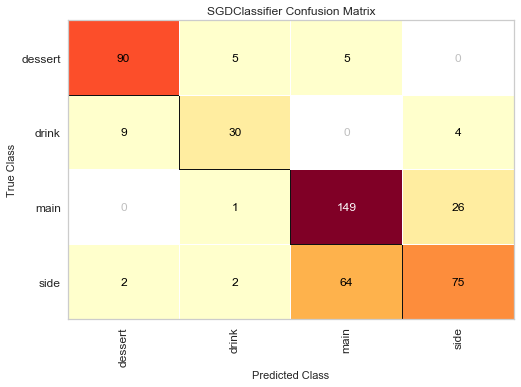

In [22]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(sgd, classes=['dessert','drink','main','side'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.show()

### Recommendation program

In [23]:
#Building the dummy dataset based on doc_vec
s = np.where( doc_vec.toarray() > 0, 1,0)
data = pd.DataFrame(data = s, columns = vectorizer.get_feature_names())

#Concatenating new columns for score calculation
data['ingredients_number'] = data.sum(axis=1)
data['links'] = df2.links

In [24]:
final_bag_of_ingredients =  vectorizer.get_feature_names()

#Mispelling corrections and adjustments for input

import re
import string
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(final_bag_of_ingredients)

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    print('\nP: ',(WORDS[word] / N))
    return WORDS[word] / N

def correction(word): 
    #import pdb; pdb.set_trace()
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    #print('\nknow: ',set(w for w in words if w in WORDS))
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    #print ('\nedits1: ', set(deletes + transposes + replaces + inserts))
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [25]:
#Mispelling corrections and adjustments for input according to bag_of_ingredients
import re
import string
from collections import Counter

def words2(text): return re.findall(r'\w+', text.lower())

WORDS2 = Counter(bag_of_ingredients)

def P2(word2, N=sum(WORDS2.values())): 
    "Probability of `word2`."
    print('\nP: ',(WORDS2[word2] / N))
    return WORDS2[word2] / N

def correction2(word2): 
    #import pdb; pdb.set_trace()
    "Most probable spelling correction for word."
    return max(candidates2(word2), key=P2)

def candidates2(word2): 
    "Generate possible spelling corrections for word."
    return (known2([word2]) or known2(edits12(word2)) or known2(edits22(word2)) or [word2])

def known2(words2): 
    "The subset of `words` that appear in the dictionary of WORDS."
    #print('\nknow: ',set(w for w in words if w in WORDS))
    return set(w for w in words2 if w in WORDS2)

def edits12(word2):
    "All edits that are one edit away from `word2`."
    letters2    = 'abcdefghijklmnopqrstuvwxyz'
    splits2     = [(word2[:i], word2[i:])    for i in range(len(word2) + 1)]
    deletes2    = [L + R[1:]               for L, R in splits2 if R]
    transposes2 = [L + R[1] + R[0] + R[2:] for L, R in splits2 if len(R)>1]
    replaces2   = [L + c + R[1:]           for L, R in splits2 if R for c in letters2]
    inserts2    = [L + c + R               for L, R in splits2 for c in letters2]
    #print ('\nedits1: ', set(deletes + transposes + replaces + inserts))
    return set(deletes2 + transposes2 + replaces2 + inserts2)

def edits22(word2): 
    "All edits that are two edits away from `word2`."
    return (e22 for e12 in edits12(word2) for e22 in edits12(e12))

In [26]:
#Function for recommendation
def recipe_suggestion(lista):
    lista2 = lista.split()
    lista2 = special_stem(lista2)
    lista2 = [correction2(i) for i in lista2]
    lista2 = special_stem(lista2)
    lista2 = [correction(i) for i in lista2]
    lista2.append('links')
    lista2.append('ingredients_number')
    
    #Filtering the selected columns
    filtered_data = data.filter(items=lista2)

    #Creating the selected ingredients column, with the number of ingredients in list found in each recipe
    filtered_data['selected_ingredients'] = filtered_data.sum(axis=1) - filtered_data.ingredients_number

    c = int((len(lista2)-2)/2) #This number may be at least half of ingredients (rounded up)
    filtered_data = filtered_data[filtered_data['selected_ingredients']>=c]

    #Creating score: the lower, the best
    filtered_data['score'] = filtered_data['ingredients_number'] - filtered_data['selected_ingredients']

    results = filtered_data.sort_values(['selected_ingredients','score'], ascending=[False,True])
    
    #Selection of recommendations to display
    #recomendacao = results[results['selected_ingredients'] ==  max(results.selected_ingredients)]
        
    #Recovering the dataset with full recipe details
    #recommended_recipes = df2[df2['links'].isin(results.links)].reset_index(drop=True)
    recommended_recipes = pd.merge(results.links, df2, on='links')
    recommended_recipes = recommended_recipes.head(20)
    
    return recommended_recipes

In [27]:
def ingredients_choice():
    lista = input("Quais ingredientes você quer usar hoje?")
    return lista
    
lista = ingredients_choice()

resultado = recipe_suggestion(lista)

print('Separei',len(resultado.name),' receitas para você, confira:')

for i in range(0, len(resultado.name)):
    print('\n', i+1, '. ', resultado.name[i], '\n'
         'Tempo de preparo:', resultado.prep_time[i], '\n')         

options = [i for i in range(1, (len(resultado.name)+1))]
    
def recipe_choice():
    selected_recipe = input("Selecione a sua favorita pelo número e confira os detalhes.")
    return int(selected_recipe)

s = recipe_choice()

while not s in options:
    s = recipe_choice()

print('\n',resultado.name[(s-1)],'\n')
image_link = "<img src=" + str(resultado.images[(s-1)]) +  " width='35%' height='35%' >"
display(HTML(image_link))
print('\n','Ingredientes: \n',resultado.ingredients[(s-1)],'\n\n',
     'Modo de preparo:\n', resultado.directions[(s-1)],'\n\n',
     'Confira no link:\n', resultado.links[(s-1)])

Quais ingredientes você quer usar hoje?cenoura alho poro vagem

P:  0.0008928571428571428

P:  0.0008928571428571428

P:  0.0008928571428571428

P:  0.0008928571428571428

P:  0.0013404825737265416

P:  0.0013404825737265416

P:  0.0013404825737265416

P:  0.0013404825737265416
Separei 20  receitas para você, confira:

 1 .  Sanduíche de carne desfiada e mostarda de Dijon 
Tempo de preparo: Até 2h 


 2 .  Knaidlach com caldo de frango 
Tempo de preparo: Mais de 2h 


 3 .  Risoto de damasco, queijo meia-cura e limão em uma panela só 
Tempo de preparo: Até 1h 


 4 .  Blanquete de vitela com champignon à moda antiga 
Tempo de preparo: Até 2h 


 5 .  Milho refogado picante 
Tempo de preparo: Pá-Pum 


 6 .  Alho-poró assado levíssimo 
Tempo de preparo: Até 1h 


 7 .  Cuscuz com legumes assados 
Tempo de preparo: Até 2h 


 8 .  Vichyssoise com brotos e ovas de salmão 
Tempo de preparo: Pá-Pum 


 9 .  Arroz frito com cenoura e abobrinha 
Tempo de preparo: Pá-Pum 


 10 .  Arroz com re


 Ingredientes: 
 1 frango inteiro (cerca de 2 kg) 1 cenoura 1 talo de salsão 1 cebola 4 litros de água 1 folha de louro 1 talo de salsinha com as folhas 1 folha de alho-poró 5 grãos de pimenta-do-reino 3 cravos-da-índia 

 Modo de preparo:
   Faça o pré-preparo: lave a cenoura e o talo de salsão; descasque e corte a cenoura em 4 pedaços; reserve uma folha e corte o salsão em 4 pedaços; descasque e corte a cebola em quartos. Junte as folhas de salsão, de alho-poró, de louro e o talo de salsinha e amarre com um barbante de algodão para formar um buquê.   Retire os miúdos de dentro do frango e reserve na geladeira – você pode usar numa receita de  farofa . Corte as duas metades do peito do frango, bem rente ao osso – elas vão cozinhar por menos tempo do que o resto da ave e podem ser utilizadas em outra receita.   Numa panela grande (ou caldeirão), coloque o frango, os cortes do peito, os pedaços de cenoura, salsão e cebola. Regue com a água para cobrir todos os ingredientes e leve ao fo